# Correlate GC-MS and Sensory Data

In [75]:
import pandas as pd
import numpy as np

# Statistics
from sklearn.cross_decomposition import CCA, PLSRegression
from sklearn.decomposition import PCA

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


## Load data

In [76]:
Sensory_data = pd.read_csv('/Users/lfloerl/Desktop/MICROTERROIR/curated_data/Sensory_data_median_renamed.csv', index_col=1)
Sensory_data

,Unnamed: 0,Olfactory_intensity,Citrus,Exotic_fruit,White_fruit,Floral,Green_notes,Honey,Milk,Mineral,...,Olfactory_complexity,CO2,Acidity,Bitterness,Sweetness,Volume_in_the_mouth,Balance,Alcohol,Freshness_on_the_palate,Aromatic_length
Sample,,,,,,,,,,,,,,,,,,,,,
2022_Plot4,0,4.960,0.6150,2.265,3.600,1.5650,0.1250,0.690,0.095,0.140,...,3.130,0.145,4.475,3.425,1.050,1.865,2.800,1.770,3.165,4.655
2022_Plot5,1,5.160,0.2300,0.405,1.665,0.1850,0.0500,0.140,0.730,0.940,...,3.315,0.130,4.775,3.020,3.830,3.050,1.340,2.200,2.700,5.060
2022_Plot9,2,4.580,0.0405,2.185,1.740,0.0950,0.1200,2.055,0.965,1.295,...,3.395,0.115,4.680,2.565,2.135,1.280,2.735,0.925,3.535,4.670
2022_Plot12,3,4.100,0.1050,0.520,2.545,0.1500,0.0800,1.175,1.920,0.995,...,3.315,0.105,5.380,2.725,1.560,2.140,2.640,1.380,3.395,4.765
2022_Plot13,4,4.520,0.0105,0.445,2.455,0.0255,0.0505,0.545,1.980,2.915,...,2.940,0.145,4.085,2.690,1.430,0.680,1.340,2.010,2.470,2.790
2022_Plot14,5,5.480,0.1200,1.995,3.265,2.0400,0.4100,1.880,0.265,0.235,...,4.795,0.435,4.900,2.465,2.280,3.080,2.520,1.820,3.255,4.555
2022_Plot15,6,4.510,0.0450,0.190,3.890,1.5400,0.1000,1.085,3.205,0.305,...,4.030,0.165,5.225,1.650,0.525,1.945,1.720,1.110,4.200,4.580
2022_Plot17,7,4.925,0.1700,0.175,2.505,0.1850,0.1850,0.070,2.055,0.320,...,3.240,0.790,5.245,2.050,2.775,3.425,2.220,2.095,2.515,5.155
2022_Plot19,8,4.465,0.1100,0.055,1.945,0.1800,0.3700,1.500,0.165,0.810,...,2.955,0.060,4.340,1.995,0.880,1.890,2.300,1.320,3.355,3.635


In [77]:
GC_data = pd.read_csv('/Users/lfloerl/Desktop/MICROTERROIR/Metabolomics/GC-MS/GC-2022-forCorrelation.csv',index_col=1)
GC_data

,Unnamed: 0,Ethyl Acetate,Ethanol,"Butanoic acid, ethyl ester",Hexanal,Isobutyl alcohol,"1-Butanol, 3-methyl-, acetate",Isobutyl acetoacetate,1-Butanol,"2-Hexenal, (E)-",...,"Heptadecanoic acid, ethyl ester",Ethyl Oleate,"9-Octadecenoic acid (Z)-, methyl ester",Ethyl linoleate,"1,2-Benzenedicarboxylic acid, bis(2-methylpropyl) ester",3-Nitrophthalic acid,"Decanedioic acid, dibutyl ester",3-methylhomoadamantane,"7,9-Di-tert-butyl-1-oxaspiro(4,5)deca-6,9-diene-2,8-dione",Bis(2-ethylhexyl) adipate
Name,,,,,,,,,,,,,,,,,,,,,
2022_Plot12,0,4.044601e+07,6.268163e+06,NaN,NaN,7.315582e+06,1.171208e+07,NaN,NaN,NaN,...,4.630342e+06,1.035902e+07,1.208502e+07,3999943.334,NaN,NaN,1978435.968,2538423.109,NaN,NaN
2022_Plot13,1,1.705651e+07,1.622508e+07,NaN,NaN,1.073399e+07,9.517184e+06,NaN,NaN,NaN,...,NaN,9.794400e+06,8.385059e+06,3807880.985,NaN,NaN,1396834.980,2662850.074,NaN,NaN
2022_Plot14,2,3.186851e+07,1.723101e+07,NaN,NaN,9.989322e+06,1.287431e+07,NaN,NaN,NaN,...,4.452497e+06,1.592850e+07,1.330391e+07,3682559.492,NaN,NaN,1451202.651,2038969.987,NaN,NaN
2022_Plot15,3,7.388409e+06,1.279447e+07,NaN,NaN,1.709280e+07,8.417051e+06,NaN,NaN,NaN,...,4.688986e+06,1.232562e+07,9.918335e+06,4082119.865,NaN,NaN,1240058.055,2579563.311,NaN,NaN
2022_Plot17,4,2.230921e+07,7.915647e+06,NaN,NaN,6.865375e+06,NaN,NaN,NaN,NaN,...,3.509227e+06,1.226679e+07,1.062057e+07,3907355.776,NaN,NaN,1657498.848,1915552.516,NaN,NaN
2022_Plot19,5,1.737692e+07,4.304610e+06,NaN,NaN,3.218341e+07,1.538701e+07,NaN,NaN,NaN,...,4.280751e+06,1.130079e+07,1.110439e+07,3649907.391,NaN,NaN,1344575.385,2985598.387,NaN,NaN
2022_Plot20,6,2.166976e+07,1.210758e+07,NaN,NaN,2.366070e+07,1.083527e+07,NaN,NaN,NaN,...,4.771635e+06,1.147711e+07,1.040428e+07,3259074.277,NaN,NaN,1389473.114,2226074.812,NaN,NaN
2022_Plot4,7,2.890524e+07,1.901262e+07,NaN,NaN,1.150645e+07,1.290877e+07,NaN,NaN,NaN,...,4.121827e+06,1.215296e+07,9.436484e+06,3829695.690,NaN,NaN,1499788.118,2512592.598,NaN,NaN
2022_Plot5,8,3.329922e+07,9.910208e+06,NaN,NaN,1.243583e+07,1.447484e+07,NaN,NaN,NaN,...,4.975298e+06,1.082590e+07,1.273506e+07,3782389.064,NaN,NaN,1400654.175,2236557.268,NaN,NaN


## Canonical Correlation Analysis (CCA)

In [78]:
# drop cols with NaN
GC_data_cleaned = GC_data.dropna(axis=1)
GC_data_cleaned.shape

(10, 52)

In [79]:
# Initialize CCA
cca = CCA(n_components=2) 

In [80]:
# Fit the data to the CCA model
cca.fit(Sensory_data, GC_data_cleaned)

# Transform the data: dimensionality reduction 
cca_df1, cca_df2 = cca.transform(Sensory_data, GC_data_cleaned)

#### Visualization

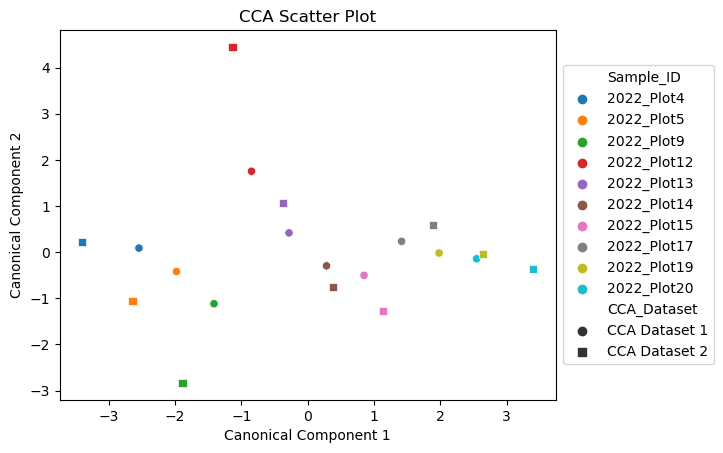

In [81]:
# Assuming cca_df1 and cca_df2 are your transformed DataFrames from CCA

#  sample_ids is a Series containing the Sample IDs corresponding to the rows of cca_df1 and cca_df2
sample_ids = pd.Series(Sensory_data.index)

# Combine the Sample IDs with the transformed DataFrames
cca_combined_df1 = pd.DataFrame(cca_df1, columns=['CCA_Component_1', 'CCA_Component_2'])
cca_combined_df1['Sample_ID'] = sample_ids
cca_combined_df1['CCA_Dataset'] = 'CCA Dataset 1'

cca_combined_df2 = pd.DataFrame(cca_df2, columns=['CCA_Component_1', 'CCA_Component_2'])
cca_combined_df2['Sample_ID'] = sample_ids
cca_combined_df2['CCA_Dataset'] = 'CCA Dataset 2'

cca_combined = pd.concat([cca_combined_df1, cca_combined_df2])

# Create the scatter plot
sns.scatterplot(x='CCA_Component_1', y='CCA_Component_2', data=cca_combined, hue='Sample_ID', style='CCA_Dataset', markers=['o', 's'])

plt.xlabel('Canonical Component 1')
plt.ylabel('Canonical Component 2')
plt.title('CCA Scatter Plot')
plt.legend(title='Sample ID')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## PLSR analysis 
according to Seisone et al (2016, https://doi.org/10.1016/j.foodchem.2016.04.134) the most common technique to correlate GC-MS and Sensory Data 


In [82]:
# Assuming df1 and df2 are your two dataframes

# Convert dataframes to numpy arrays
X = GC_data_cleaned.values
Y = Sensory_data.values

# Perform PLSR
pls = PLSRegression(n_components=2)
pls.fit(X, Y)

# Get the transformed data
X_scores, Y_scores = pls.transform(X, Y)

# Convert transformed data back to pandas dataframes (optional)
X_scores_df = pd.DataFrame(X_scores, index=GC_data_cleaned.index, columns=['PLS1', 'PLS2'])
Y_scores_df = pd.DataFrame(Y_scores, index=Sensory_data.index, columns=['PLS1', 'PLS2'])

# Print or further analyze the transformed dataframes
print("Transformed data from GC:")
print(X_scores_df)
print("\nTransformed data from Sensory:")
print(Y_scores_df)

Transformed data from GC:
                 PLS1      PLS2
Name                           
2022_Plot12 -4.691716  0.600016
2022_Plot13 -4.243644 -3.611207
2022_Plot14  4.223325  2.966809
2022_Plot15 -2.416276 -0.177086
2022_Plot17  6.435773 -4.505779
2022_Plot19 -2.661170  1.991509
2022_Plot20  0.602694  0.492122
2022_Plot4  -1.545684 -2.269250
2022_Plot5   3.523912  0.559421
2022_Plot9   0.772786  3.953446

Transformed data from Sensory:
                 PLS1      PLS2
Sample                         
2022_Plot4  -5.085011  0.500900
2022_Plot5  -4.221023 -4.016545
2022_Plot9   2.123726  1.783016
2022_Plot12  0.966784 -0.324125
2022_Plot13  6.873602 -4.212559
2022_Plot14 -4.266252  2.571194
2022_Plot15  0.667034  1.395028
2022_Plot17 -3.904281 -2.649061
2022_Plot19  4.450534  0.793486
2022_Plot20  2.394886  4.158666


#### Visualization: Biplot

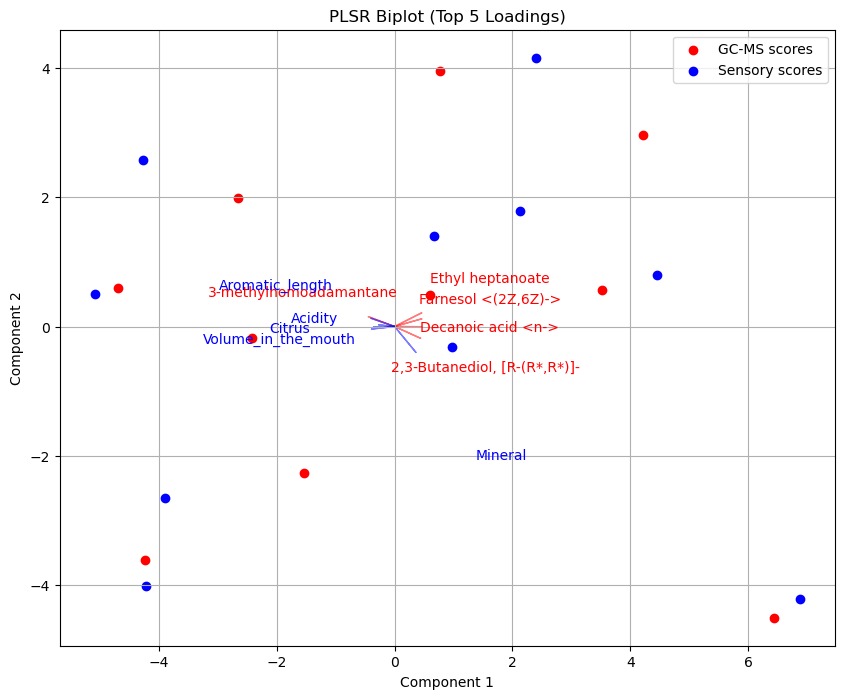

In [83]:
# Get the transformed data
X_scores, Y_scores = pls.transform(X, Y)
X_loadings = pls.x_loadings_
Y_loadings = pls.y_loadings_

# Sort loadings based on magnitude
X_loadings_sorted_indices = np.argsort(np.abs(X_loadings[:, 0]))[::-1][:5]
Y_loadings_sorted_indices = np.argsort(np.abs(Y_loadings[:, 0]))[::-1][:5]

# Create biplot
plt.figure(figsize=(10, 8))
plt.scatter(X_scores[:, 0], X_scores[:, 1], label='GC-MS scores', c='r')
plt.scatter(Y_scores[:, 0], Y_scores[:, 1], label='Sensory scores', c='b')

# Plot top 5 variable loadings for df1
for i in X_loadings_sorted_indices:
    plt.arrow(0, 0, X_loadings[i, 0]*2, X_loadings[i, 1]*2, color='r', alpha=0.5)
    plt.text(X_loadings[i, 0]*7, X_loadings[i, 1]*7, GC_data_cleaned.columns[i], color='r', ha='center', va='center')

# Plot top 5 variable loadings for df2
for i in Y_loadings_sorted_indices:
    plt.arrow(0, 0, Y_loadings[i, 0]*2, Y_loadings[i, 1]*2, color='b', alpha=0.5)
    plt.text(Y_loadings[i, 0]*10, Y_loadings[i, 1]*10, Sensory_data.columns[i], color='b', ha='center', va='center')

plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.title('PLSR Biplot (Top 5 Loadings)')
plt.grid(True)
plt.show()